# Análise Exploratória de Dados

## 1) Entendimento dos dados:

In [1]:
# Import das bibliotecas necessárias
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import dos dados
df = pd.read_csv('../dados/processed/car_price_dataset_clean.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Dicionário dos dados:

| Coluna        | Tipo Estatístico | Tipo Computacional | Significado                                                                 |
|---------------|------------------|--------------------|----------------------------------------------------------------------------|
| Brand         | Qualitativo      | object (string)    | Marca do veículo                                                           |
| Model         | Qualitativo      | object (string)    | Modelo do veículo                                                          |
| Year          | Qualitativo     | int64              | Ano de fabricação do veículo                                               |
| Engine_Size   | Quantitativo     | float64            | Tamanho do motor do veículo (em litros)                                    |
| Fuel_Type     | Qualitativo      | object (string)    | Tipo de combustível utilizado pelo veículo                                 |
| Transmission  | Qualitativo      | object (string)    | Tipo de transmissão do veículo (Manual, Automática, Semi-Automática, etc.) |
| Mileage       | Quantitativo     | int64              | Quilometragem rodada pelo veículo                                          |
| Doors         | Quantitativo     | int64              | Número de portas do veículo                                                |
| Owner_Count   | Quantitativo     | int64              | Número de proprietários anteriores                                         |
| Price         | Quantitativo     | int64              | Preço do veículo (em unidade monetária)                                    |

## 2) Análise Univariada

In [2]:
# Criando funções para análise univariada
def estatistica_qualitativa(df, column):
    coluna = df[column].copy()
    contagem = coluna.value_counts()
    proporcao = coluna.value_counts(normalize=True) * 100
    df_resumo = pd.DataFrame({'Contagem': contagem, 'Proporção (%)': proporcao})
    df_resumo.index.name = column
    df_resumo.reset_index(inplace=True)
    df_resumo['Proporção (%)'] = df_resumo['Proporção (%)'].round(2)
    return df_resumo

def plot_histogram(df, column, qtd_bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=qtd_bins)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid()
    plt.show()

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.grid()
    plt.show()


def plot_bar(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts(normalize=True).index)
    plt.title(f'Contagem de {column}')
    plt.xlabel('Frequência')
    plt.ylabel(column)
    plt.grid()
    plt.show()

def plot_pie(df, column):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title(f'Gráfico de Pizza de {column}')
    plt.ylabel('')
    plt.grid()
    plt.show()

### `Brand`:

In [3]:
estatistica_qualitativa(df, 'Brand')

,Brand,Contagem,Proporção (%)
0,Ford,1048,10.48
1,Audi,1038,10.38
2,Volkswagen,1020,10.20
3,Honda,1009,10.09
4,Chevrolet,1003,10.03
5,BMW,999,9.99
6,Hyundai,995,9.95
7,Kia,976,9.76
8,Toyota,970,9.70
9,Mercedes,942,9.42


In [4]:
diferenca_max_min = df['Brand'].value_counts().max() - df['Brand'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferença entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Brand"].value_counts().max()}')

print(f'Proporção da diferença em relação à marca menos frequente: {proporcao_max_min:.2f}%')

Diferença entre a marca mais frequente e a menos frequente: 106
Quantidade de registros da marca mais frequente: 1048
Proporção da diferença em relação à marca menos frequente: 11.25%


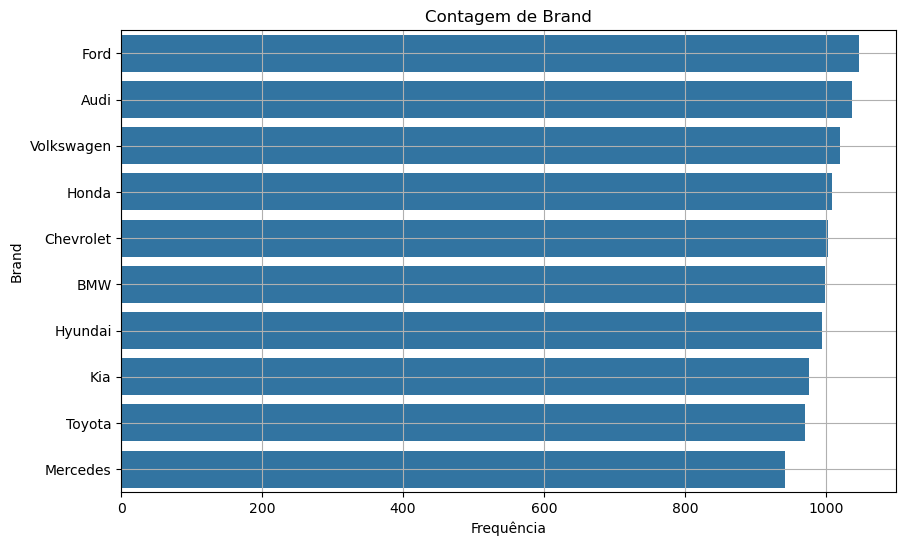

In [5]:
plot_bar(df, 'Brand')

> Há uma quantidade balanceada de registros de cada Marca de carro, havendo no total 10 valores de marcas de carros, como exibidos na tabela acima

> A Ford é a marca com maior quantidade de veículos, porém tem apenas 11.25% dados a mais em relação a marca com menor quantidade de veículos (Mercedes)

### `Model`:

In [6]:
estatistica_qualitativa(df, 'Model')

,Model,Contagem,Proporção (%)
0,Accord,365,3.65
1,Fiesta,363,3.63
2,Impala,355,3.55
3,5 Series,353,3.53
4,Tiguan,352,3.52
5,Focus,351,3.51
6,Q5,350,3.50
7,A4,350,3.50
8,Elantra,347,3.47
9,Golf,339,3.39


In [7]:
diferenca_max_min = df['Model'].value_counts().max() - df['Model'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Brand'].value_counts().min()) * 100

print(f'Diferença entre a marca mais frequente e a menos frequente: {diferenca_max_min}')
print(f'Quantidade de registros da marca mais frequente: {df["Model"].value_counts().max()}')

print(f'Proporção da diferença em relação à marca menos frequente: {proporcao_max_min:.2f}%')

Diferença entre a marca mais frequente e a menos frequente: 59
Quantidade de registros da marca mais frequente: 365
Proporção da diferença em relação à marca menos frequente: 6.26%


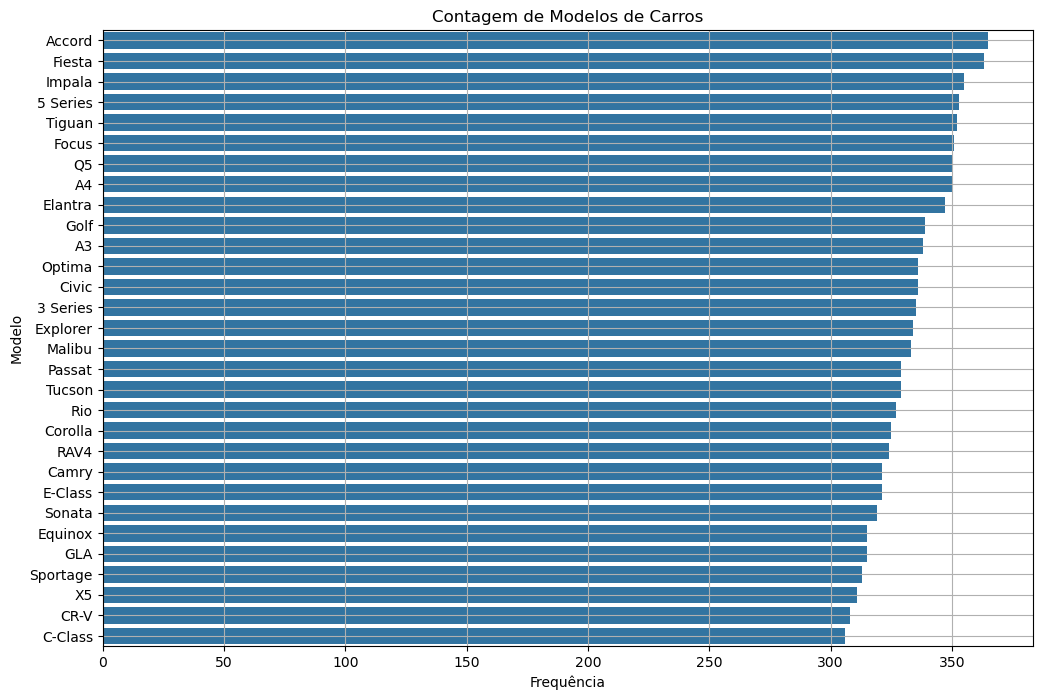

In [8]:
# Plotar grafico de barras horizontais que possa suportar 29 modelos de carros
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Model'], order=df['Model'].value_counts().index)
plt.title('Contagem de Modelos de Carros')
plt.xlabel('Frequência')
plt.ylabel('Modelo')
plt.grid()  
plt.show()


> Mesmo havendo um total de 30 modelos, não há uma diferença significativa entre a quantidade de dados de carro por marca, garantindo um balanceamento para tal fator

> O Accord é o modelo com maior quantidade de veículos, porém tem apenas 6.26% dados a mais em relação ao modelo com menor quantidade de veículos (C-Class)

### `Year`:

In [9]:
df['Year'].describe()

count    10000.000000
mean      2011.543700
std          6.897699
min       2000.000000
25%       2006.000000
50%       2012.000000
75%       2017.000000
max       2023.000000
Name: Year, dtype: float64

> No atual contexto, a variável ano na verdade se encaixa majoritariamente como qualitativa do que como quantitativa, por não indicar uma contagem ou um registro contínuo, mas sim um timestamp.

In [10]:
estatistica_qualitativa(df, 'Year')

,Year,Contagem,Proporção (%)
0,2002,462,4.62
1,2011,449,4.49
2,2023,448,4.48
3,2012,437,4.37
4,2017,433,4.33
5,2005,431,4.31
6,2010,431,4.31
7,2007,430,4.30
8,2015,426,4.26
9,2018,425,4.25


In [11]:
diferenca_max_min = df['Year'].value_counts().max() - df['Year'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Year'].value_counts().min()) * 100

print(f'Diferença entre o ano com mais veículos e ano com menos: {diferenca_max_min}')
print(f'Quantidade de registros do ano que mais aparece: {df["Year"].value_counts().max()}')

print(f'Proporção da diferença em relação aos anos de veículos: {proporcao_max_min:.2f}%')

Diferença entre o ano com mais veículos e ano com menos: 81
Quantidade de registros do ano que mais aparece: 462
Proporção da diferença em relação aos anos de veículos: 21.26%


Text(0.5, 1.0, 'Contagem de Anos de Carros')

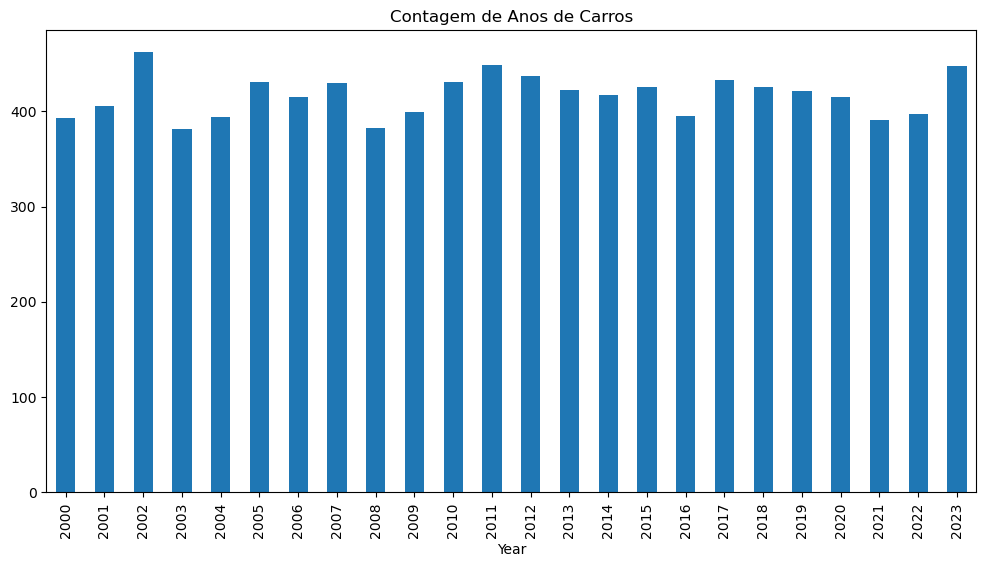

In [12]:
# Gráfico de barras para anos ordenado por ano
ax = df['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Contagem de Anos de Carros')

In [13]:
# Análise por decada
df_2000s = df[df['Year'].between(2000, 2009)]
df_2010s = df[df['Year'].between(2010, 2019)]
df_2020s = df[df['Year'] >= 2020]

print(f'Quantidade de veículos dos anos 2000: {len(df_2000s)}')
print(f'Quantidade de veículos dos anos 2010: {len(df_2010s)}')
print(f'Quantidade de veículos dos anos 2020: {len(df_2020s)}')

Quantidade de veículos dos anos 2000: 4093
Quantidade de veículos dos anos 2010: 4256
Quantidade de veículos dos anos 2020: 1651


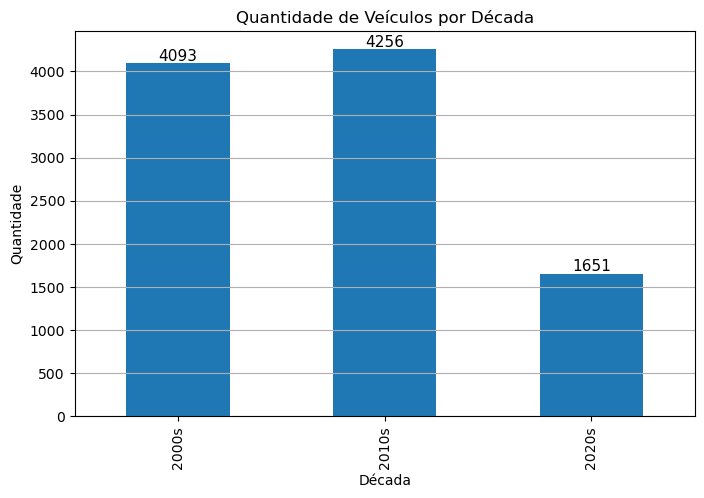

In [14]:
# Gráfico de barras para décadas
# Criando uma Series com as quantidades por década
decadas = pd.Series({
    '2000s': len(df_2000s),
    '2010s': len(df_2010s),
    '2020s': len(df_2020s)
})

# Plotando o gráfico de barras
plt.figure(figsize=(8, 5))
ax = decadas.plot(kind='bar')
plt.title('Quantidade de Veículos por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.grid(axis='y')

# Adicionando os valores acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.show()


> Há um leve desbalanceamento em relação a quantidade de veículos por ano, e ainda maior considerando por década, onde há uma quantidade relativamente menor de veículos da década de 2020 e prepoderância da década de 2010.

### `Engine_Size`:

In [15]:
df['Engine_Size'].describe()

count    10000.000000
mean         3.000560
std          1.149324
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Engine_Size, dtype: float64

In [16]:
df['Engine_Size'].value_counts()

Engine_Size
3.7    273
4.4    271
3.6    267
2.5    266
1.5    265
4.0    263
2.8    262
4.6    262
1.3    261
2.2    259
1.4    259
2.6    259
1.6    258
2.0    258
4.1    257
3.5    256
3.1    254
3.3    254
4.7    253
3.8    253
2.9    253
1.2    251
4.5    250
2.7    250
3.2    249
1.8    249
4.9    247
1.7    246
3.4    243
4.3    242
2.4    240
3.0    236
3.9    236
2.1    234
4.2    232
1.9    232
4.8    231
1.1    230
2.3    223
1.0    113
5.0    103
Name: count, dtype: int64

In [17]:
# Calcular bins com a regra de Sturges
x = df['Engine_Size'].dropna()
n = len(df['Engine_Size'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman–Diaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman–Diaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman–Diaconis: 22 bins


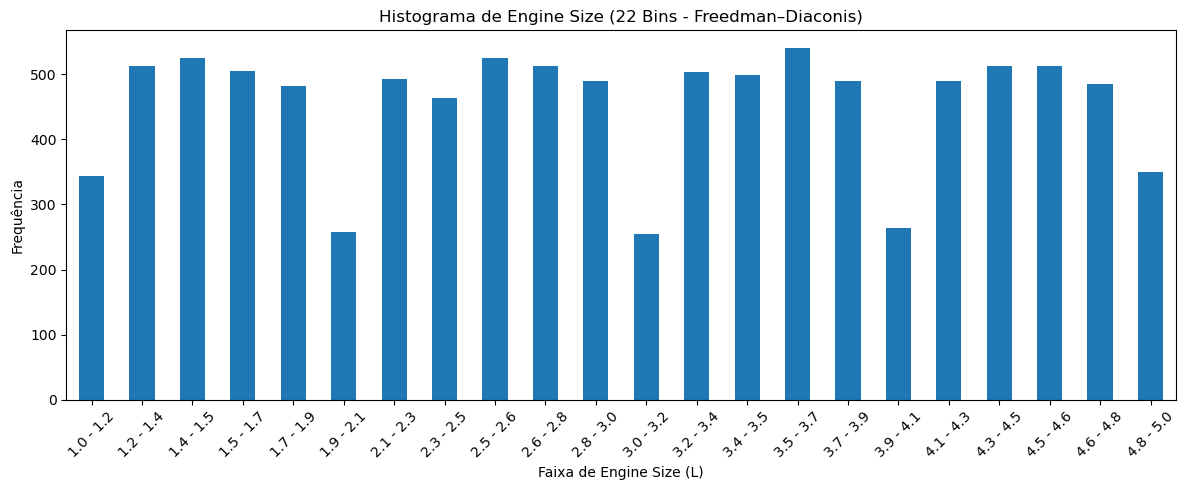

In [18]:
x = df['Engine_Size'].dropna()

# Gerar os 22 intervalos manualmente
bin_edges = np.linspace(x.min(), x.max(), num=23)  # 23 pontos = 22 intervalos
labels = [f"{round(bin_edges[i],1)} - {round(bin_edges[i+1],1)}" for i in range(len(bin_edges)-1)]

# Criar uma nova coluna com os rótulos dos bins
df['Engine_Bin'] = pd.cut(x, bins=bin_edges, labels=labels, include_lowest=True)

# Ver quantos dados caíram em cada intervalo
frequencias = df['Engine_Bin'].value_counts().sort_index()

# Plotar histograma com rótulos personalizados
frequencias.plot(kind='bar', figsize=(12, 5))
plt.xticks(rotation=45)
plt.xlabel('Faixa de Engine Size (L)')
plt.ylabel('Frequência')
plt.title('Histograma de Engine Size (22 Bins - Freedman–Diaconis)')
plt.tight_layout()
plt.show()

In [19]:
# Agrupando motores
def categorize_engine_size(size):
    if size < 1.0:
        return 'Menos de 1.0L'
    elif 1.0 <= size < 1.5:
        return '1.0L a 1.5L'
    elif 1.5 <= size < 2.0:
        return '1.5L a 2.0L'
    elif 2.0 <= size < 2.5:
        return '2.0L a 2.5L'
    elif 2.5 <= size < 3.0:
        return '2.5L a 3.0L'
    elif 3.0 <= size < 3.5:
        return '3.0L a 3.5L'
    elif 3.5 <= size < 4.0:
        return '3.5L a 4.0L'
    elif 4.0 <= size < 4.5:
        return '4.0L a 4.5L'
    elif 4.5 <= size < 5.0:
        return '4.5L a 5.0L'
    
df_agrupamento = df.copy()
df_agrupamento['Engine_Size_Category'] = df_agrupamento['Engine_Size'].apply(categorize_engine_size)
estatistica_qualitativa(df_agrupamento, 'Engine_Size_Category')

,Engine_Size_Category,Contagem,Proporção (%)
0,2.5L a 3.0L,1290,13.03
1,3.5L a 4.0L,1285,12.98
2,4.0L a 4.5L,1265,12.78
3,1.5L a 2.0L,1250,12.63
4,4.5L a 5.0L,1243,12.56
5,3.0L a 3.5L,1236,12.49
6,2.0L a 2.5L,1214,12.27
7,1.0L a 1.5L,1114,11.26


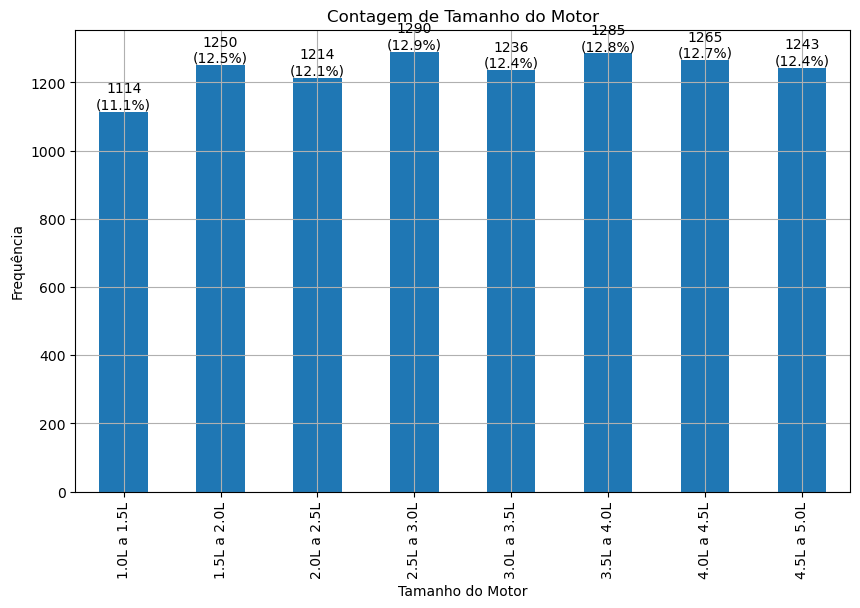

In [26]:
# Plotar gráfico de barras para categorias de tamanho do motor com números e porcentagem
ax = df_agrupamento['Engine_Size_Category'].value_counts().sort_index().plot(
    kind='bar', figsize=(10, 6)
)
plt.title('Contagem de Tamanho do Motor')
plt.xlabel('Tamanho do Motor')
plt.ylabel('Frequência')
plt.grid()

# Adiciona os valores absolutos e percentuais acima das barras
total = len(df_agrupamento)
for p in ax.patches:
    valor = int(p.get_height())
    percentual = valor / total * 100
    ax.annotate(f'{valor}\n({percentual:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


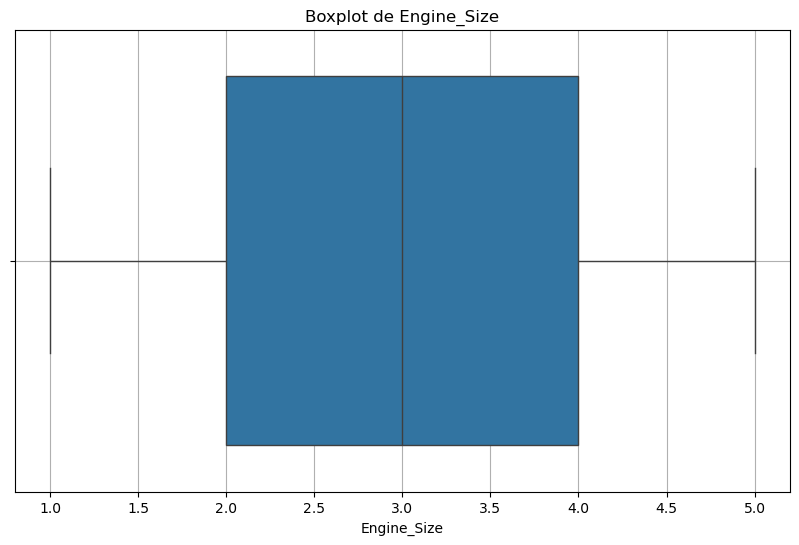

In [21]:
# Boxplot
plot_boxplot(df, 'Engine_Size')

In [28]:
IQR_Engine_Size = df['Engine_Size'].quantile(0.75) - df['Engine_Size'].quantile(0.25)
quartis = df['Engine_Size'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(f'IQR do tamanho do motor: {IQR_Engine_Size}')
print(f'Quartis do tamanho do motor:\n{quartis}')
print(f'Curtoses do tamanho do motor:\n{stats.kurtosis(df["Engine_Size"])}')
print(f'Assimetria do tamanho do motor:\n{stats.skew(df["Engine_Size"])}')

IQR do tamanho do motor: 2.0
Quartis do tamanho do motor:
0.1    1.4
0.2    1.8
0.3    2.2
0.4    2.6
0.5    3.0
0.6    3.4
0.7    3.8
0.8    4.2
0.9    4.6
Name: Engine_Size, dtype: float64
Curtoses do tamanho do motor:
-1.1966318041432136
Assimetria do tamanho do motor:
-0.008233754006580602


> Há uma disparidade grande em relação a quantidade de veículos com volume interno do maior que 2.0L e os de quantia menor.

> No demais, há uma quantidade balanceada em relação a quantidade de veículos por faixa de volume interno do motor

### `Fuel Type`

In [30]:
estatistica_qualitativa(df, 'Fuel_Type')

,Fuel_Type,Contagem,Proporção (%)
0,Electric,2625,26.25
1,Diesel,2512,25.12
2,Hybrid,2453,24.53
3,Petrol,2410,24.10


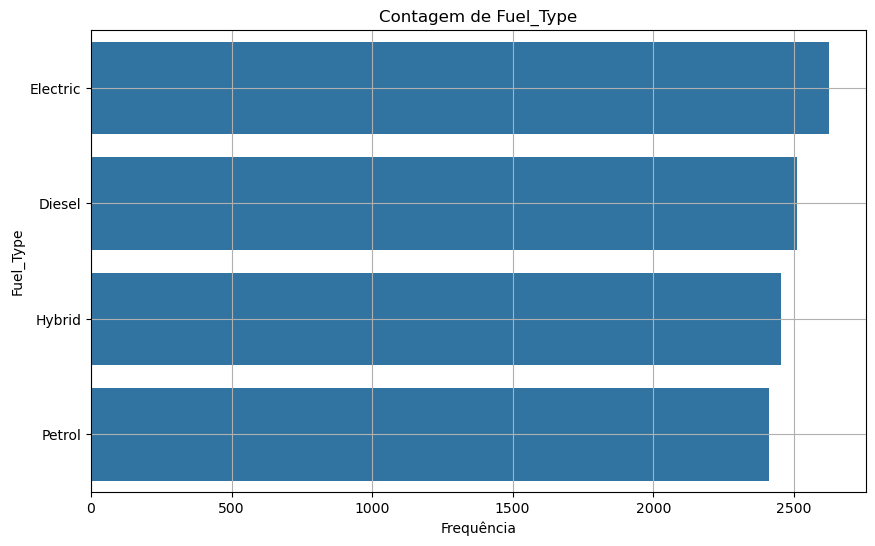

In [31]:
plot_bar(df, 'Fuel_Type')

In [32]:
diferenca_max_min = df['Fuel_Type'].value_counts().max() - df['Fuel_Type'].value_counts().min()
proporcao_max_min = (diferenca_max_min / df['Fuel_Type'].value_counts().min()) * 100

print(f'Diferença de dados entre o tipo de combustível com maior quantidade de veículos e o menor : {diferenca_max_min}')
print(f'Quantidade de registros do mais frequente: {df["Fuel_Type"].value_counts().max()}')

print(f'Proporção da diferença em relação ao marca menos frequente: {proporcao_max_min:.2f}%')

Diferença de dados entre o tipo de combustível com maior quantidade de veículos e o menor : 215
Quantidade de registros do mais frequente: 2625
Proporção da diferença em relação ao marca menos frequente: 8.92%


> Há quatro tipos de veículos no dataset: movidos a gasolina apenas, híbridos (gasolina e álcool), diesel e elétricos

> Apesar de haver uma maior quantidade de veículos elétricos, a quantidade dos veículos por tipo de combustível não chega a ser tanta, considerando o tamanho do dataset (apenas 8,92%)

### `Transmission`

In [33]:
estatistica_qualitativa(df, 'Transmission')

,Transmission,Contagem,Proporção (%)
0,Manual,3372,33.72
1,Automatic,3317,33.17
2,Semi-Automatic,3311,33.11


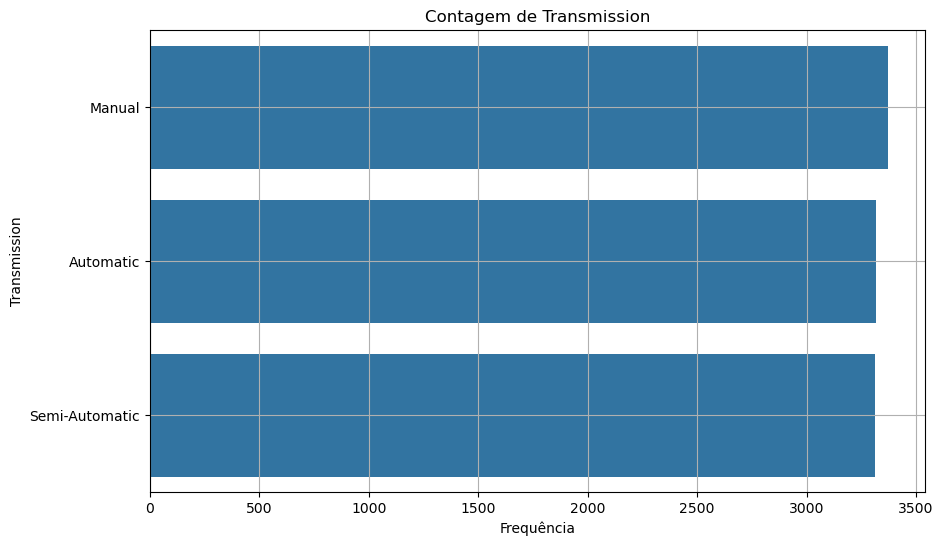

In [34]:
plot_bar(df, 'Transmission')

> A quantidade de diferentes dados de acordo com o sistema de transmissão do veículo (manual, semiautomatico ou automático) é deveras balanceada entre as classes, em que todas as classes tem por volta de 33% de representatividade

### `Mileage`

In [35]:
df['Mileage'].describe()

count     10000.000000
mean     149239.111800
std       86322.348957
min          25.000000
25%       74649.250000
50%      149587.000000
75%      223577.500000
max      299947.000000
Name: Mileage, dtype: float64

In [41]:
# Calcular bins com a regra de Sturges
x = df['Mileage'].dropna()
n = len(df['Mileage'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman–Diaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman–Diaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman–Diaconis: 22 bins


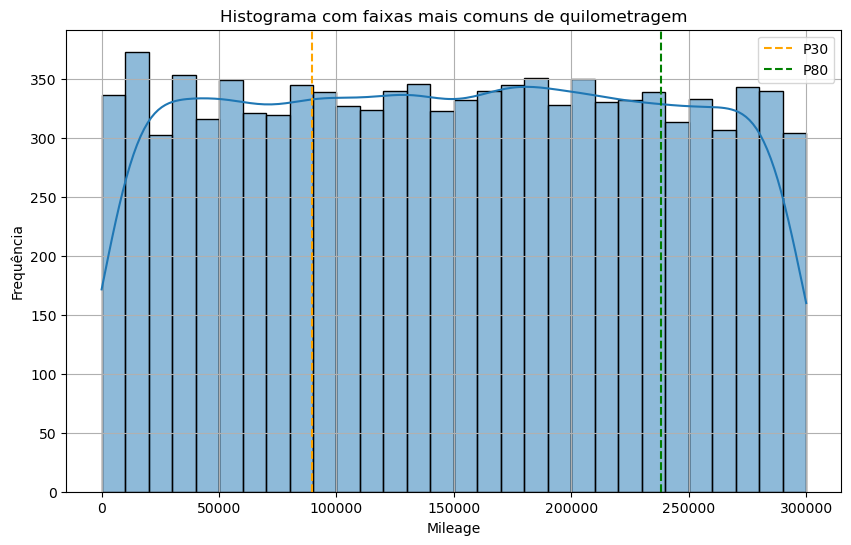

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=30, kde=True)
plt.axvline(df['Mileage'].quantile(0.3), color='orange', linestyle='--', label='P30')
plt.axvline(df['Mileage'].quantile(0.8), color='green', linestyle='--', label='P80')
plt.legend()
plt.title('Histograma com faixas mais comuns de quilometragem')
plt.xlabel('Mileage')
plt.ylabel('Frequência')
plt.grid()
plt.show()


In [56]:
IQR_Mileage = df['Mileage'].quantile(0.75) - df['Mileage'].quantile(0.25)
quartis = df['Mileage'].quantile([0.25, 0.5, 0.75])
percentis = df['Mileage'].quantile([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9])
curtose = stats.kurtosis(df['Mileage'])
assimetria = stats.skew(df['Mileage'])
print(f'IQR da quilometragem: {IQR_Mileage}')
print(f'Quartis da quilometragem:\n{quartis}')
print(f'Percentis da quilometragem:\n{percentis}')
print(f'Curtose da quilometragem: {curtose}')
print(f'Assimetria da quilometragem: {assimetria}')

IQR da quilometragem: 148928.25
Quartis da quilometragem:
0.25     74649.25
0.50    149587.00
0.75    223577.50
Name: Mileage, dtype: float64
Percentis da quilometragem:
0.1     29586.5
0.2     59307.0
0.3     89633.6
0.4    119878.2
0.6    179242.4
0.7    208518.0
0.8    238265.6
0.9    269373.4
Name: Mileage, dtype: float64
Curtose da quilometragem: -1.1909668975513825
Assimetria da quilometragem: 0.0009186334048228518


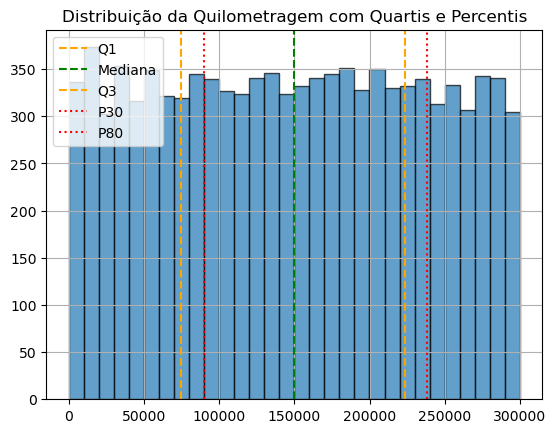

In [52]:
plt.hist(df['Mileage'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(df['Mileage'].quantile(0.25), color='orange', linestyle='--', label='Q1')
plt.axvline(df['Mileage'].quantile(0.5), color='green', linestyle='--', label='Mediana')
plt.axvline(df['Mileage'].quantile(0.75), color='orange', linestyle='--', label='Q3')
plt.axvline(df['Mileage'].quantile(0.3), color='red', linestyle=':', label='P30')
plt.axvline(df['Mileage'].quantile(0.8), color='red', linestyle=':', label='P80')
plt.legend()
plt.title('Distribuição da Quilometragem com Quartis e Percentis')
plt.grid()
plt.show()


> Os dados da quilometragem (em milhas) estão bem dispersos ao entorno do conjunto dos valores

> A maior parte se encontra dentro da faixa (p3 - p8) de aproximadamente: 90.000 - 240.000 rodados (milhas/ km)

> Embora a distribuição seja simétrica, a própria curtose mostra que ela não é normal, pelo formato "achatado" (platocurtico) da curva

### `Doors`:

In [66]:
estatistica_qualitativa(df, 'Doors')

,Doors,Contagem,Proporção (%)
0,3,2575,25.75
1,4,2514,25.14
2,5,2456,24.56
3,2,2455,24.55


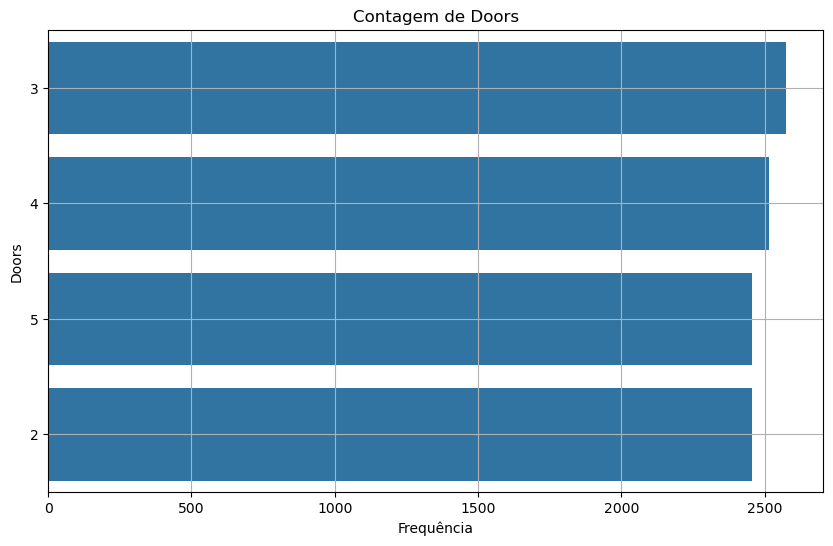

In [67]:
plot_bar(df, 'Doors')

> A quantidade de portas varia entre 2, 3, 4 ou 5 portas (possivelmente variando de acordo com modelo hatch, hatchback ou sedan)

> As classes estão relativamente balanceadas em relação a quantidade de registroos de veículos com cada quantidade de portas.

### `Owner_Count`

In [70]:
df['Owner_Count'].describe()

count    10000.000000
mean         2.991100
std          1.422682
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Owner_Count, dtype: float64

In [71]:
df['Owner_Count'].value_counts()

Owner_Count
5    2036
1    2036
2    2020
3    1977
4    1931
Name: count, dtype: int64

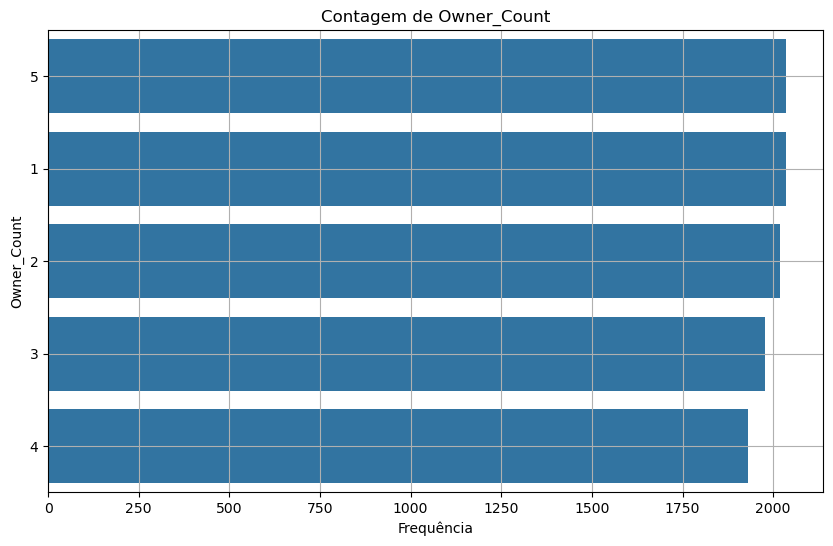

In [79]:
plot_bar(df_sort_owner, 'Owner_Count')

> A quantidade de donos que um veículo já teve tem quantidade de registros bimodal, ou seja, a maior parte dos veículos já teve ou 5 donos ou apenas 1

> No demais, apesar deste fator, a quantidade de registros é balanceada de acordo com as classes de quantidade de donos.

### `Price`

In [80]:
df['Price'].describe()

count    10000.00000
mean      8852.96440
std       3112.59681
min       2000.00000
25%       6646.00000
50%       8858.50000
75%      11086.50000
max      18301.00000
Name: Price, dtype: float64

In [82]:
# Calcular bins com a regra de Sturges
x = df['Price'].dropna()
n = len(df['Price'])

sturges_bins = int(np.ceil(np.log2(n) + 1))

# Calcular bins com Rice
rice_bins = int(np.ceil(2 * n ** (1/3)))

# Calcular bins com Freedman–Diaconis
iqr = x.quantile(0.75) - x.quantile(0.25)
bin_width = 2 * iqr / (n ** (1/3))
fd_bins = int(np.ceil((x.max() - x.min()) / bin_width))

print(f'Sturges: {sturges_bins} bins')
print(f'Rice: {rice_bins} bins')
print(f'Freedman–Diaconis: {fd_bins} bins')

Sturges: 15 bins
Rice: 44 bins
Freedman–Diaconis: 40 bins


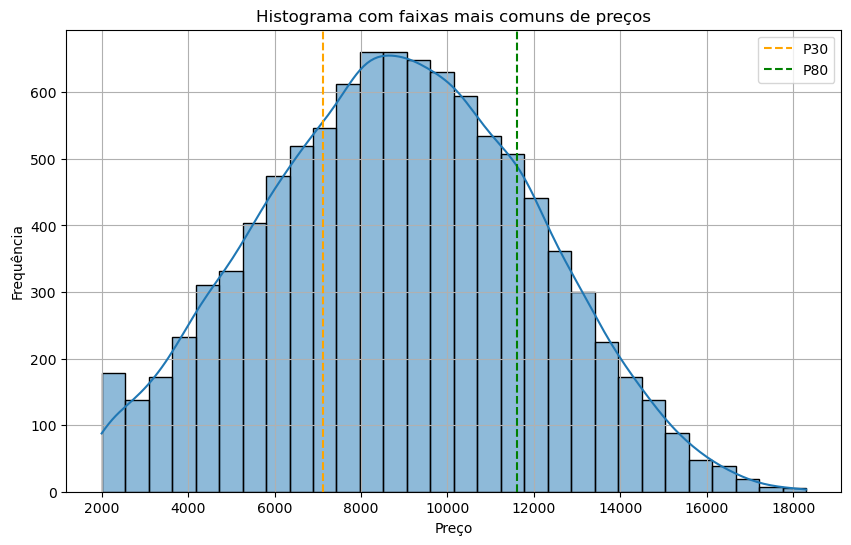

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.axvline(df['Price'].quantile(0.3), color='orange', linestyle='--', label='P30')
plt.axvline(df['Price'].quantile(0.8), color='green', linestyle='--', label='P80')
plt.legend()
plt.title('Histograma com faixas mais comuns de preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.grid()
plt.show()


In [ ]:
print(f'IQR do preço: {df["Price"].quantile(0.75) - df["Price"].quantile(0.25)}')
print(f'Quartis do preço:\n{df["Price"].quantile([0.25, 0.5, 0.75])}')
print(f'Percentis do preço:\n{df["Price"].quantile([0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9])}')
print(f'Curtose do preço: {stats.kurtosis(df["Price"])}')
print(f'Assimetria do preço: {stats.skew(df["Price"])}')

IQR do preço: 4440.5
Interval de confiança do preço: 6646.0 - 11086.5
Quartis do preço:
0.25     6646.0
0.50     8858.5
0.75    11086.5
Name: Price, dtype: float64
Percentis do preço:
0.1     4672.4
0.2     6067.4
0.3     7127.7
0.4     8038.0
0.6     9701.4
0.7    10577.0
0.8    11602.6
0.9    12945.3
Name: Price, dtype: float64
Curtose do preço: -0.4823043030221643
Assimetria do preço: 0.026132295080798108


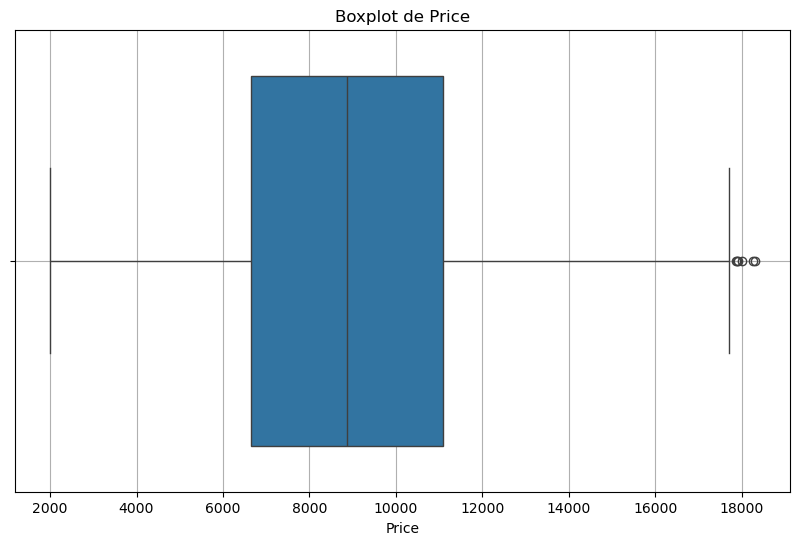

In [84]:
plot_boxplot(df, 'Price')

In [88]:
limiar_inferior = df['Price'].quantile(0.25) - 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
limiar_superior = df['Price'].quantile(0.75) + 1.5 * (df['Price'].quantile(0.75) - df['Price'].quantile(0.25))
print(f'Limiar inferior: {limiar_inferior}')
print(f'Limiar superior: {limiar_superior}')

Limiar inferior: -14.75
Limiar superior: 17747.25


> A maior parte dos dados se concentra entre valores de 6500 - 11700, sendo que valores maiores que 17000 já podem ser considerados como outliers de preço.

> O centro da distribuição se da ao entorno do valor de 8858

> A mediana próxima da média, junto ao baixo grau de assimetria indicam uma possível característica de normalidade.

> Todavia, a curtose negativa, mesmo que com baixo valor, indica uma distribuição platicúrtica, em que há menos valores concentrados nas extremidades (comparando com a distribuição normal) e um maior conjunto de valores no intervalo central.